<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Getting Started With Linear Regression

_Authors: Kevin Markham (Washington, D.C.), Ed Podojil (New York City)_

**Warning:** Many students find this lesson substantially more challenging than previous lessons in the course. Don't panic if certain parts of it don't click right away. Do put in the time to review, practice, and read about these topics as needed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline

## Demo

Let's use linear regression to predict prices in the Ames housing dataset.

In [3]:
# Use pandas to load in the data
ames_df = pd.read_csv('../assets/data/ames_train.csv')

In [4]:
# To get us started, use just the numeric columns without missing data
ames_df = ames_df.select_dtypes(['int64', 'float64']).dropna(axis='columns').drop('Id', axis='columns')

In [5]:
# Split the data into the column `y` we want to predict and the 
# columns `X` we will use to make the predictions
X = ames_df.drop('SalePrice', axis='columns')
y = ames_df.loc[:, 'SalePrice']

In [6]:
# Set aside 25% of the data for testing the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# Import a model class
from sklearn.linear_model import LinearRegression

# Create a model from that class
lr = LinearRegression()

# Ask the model to learn a function that predicts `y` from `X`
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

That's it! We just built a machine learning model.

Is it any good? Let's test it on data that it hasn't seen.

In [8]:
# Score the model on the test data
lr.score(X_test, y_test)

0.8199197610891817

This score tells us (roughly) by what factor (0 to 1) our model's errors are on average than the errors that we would get if we just guessed the average price every time. This number is substantially greater than 0, so our model works!

We can also look at the model's predictions and compare them to the actual values:

In [9]:
list(zip(lr.predict(X_test), y_test))

[(154791.87399431365, 154500),
 (310820.93527537433, 325000),
 (114033.99534952093, 115000),
 (180382.91865354078, 159000),
 (302203.28161839326, 315500),
 (45878.9760465048, 75500),
 (226197.94972165616, 311500),
 (150467.825424309, 146000),
 (42900.88162823889, 84500),
 (151952.49477002735, 135500),
 (156407.488849184, 145000),
 (114827.02728915866, 130000),
 (81941.86247199273, 81000),
 (210927.99571450741, 214000),
 (191975.720073057, 181000),
 (142655.00142217998, 134500),
 (214274.87782462698, 183500),
 (137012.44081333454, 135000),
 (118640.22607918724, 118400),
 (232571.19338999444, 226000),
 (186708.35789662786, 155000),
 (216155.41463124915, 210000),
 (193720.12402393273, 173500),
 (132737.39219830057, 129000),
 (213838.036330031, 192000),
 (152133.21549386473, 153900),
 (199805.1287979436, 181134),
 (89479.99728387163, 141000),
 (185705.99141456012, 181000),
 (183354.1920649911, 208900),
 (114815.93261392554, 127000),
 (272569.5146358685, 284000),
 (232979.92128713627, 20050

In [10]:
# Get the names of the features
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

Linear regression simply takes each of our features, multiplies it by a number, and adds up the result plus an "intercept" term. So in this case,

$$\text{Predicted Price} = \beta_0 + \beta_1 * MSSubClass + \beta_2 * LotArea + \ldots + \beta_{33} YrSold $$

where $\beta_0, \beta_1, \ldots, \beta_{33}$ are numbers that the linear regression algorithm picks for us.

(If you absorbed our lesson on linear algebra, you may see that for a linear regression model, predicted price for a given house is the inner product of our features with a vector of coefficients $[\beta_0, \beta_1, \ldots, \beta_{33}]$, except that we tack on a vector of ones to our features for the intercept term.)

We can actually look at the intercept and coefficients that our algorithm came up with:

In [11]:
# Print the intercept and the coefficients paired with the corresponding column names
print(lr.intercept_)
print(list(zip(ames_df.columns, lr.coef_)))

-463154.8190735362
[('MSSubClass', -183.38773641191813), ('LotArea', 0.40315560276887835), ('OverallQual', 18484.14620979848), ('OverallCond', 3416.4599783763156), ('YearBuilt', 336.08233555052834), ('YearRemodAdd', 166.9084714845825), ('BsmtFinSF1', 9.277514581156725), ('BsmtFinSF2', -3.904411253852561), ('BsmtUnfSF', 0.05538075084887228), ('TotalBsmtSF', 5.428484077695707), ('1stFlrSF', 12.572264236563294), ('2ndFlrSF', 14.222238941655295), ('LowQualFinSF', 4.865653067049201), ('GrLivArea', 31.660156254019498), ('BsmtFullBath', 11755.31290630639), ('BsmtHalfBath', -412.5440064465763), ('FullBath', 3809.2868701864613), ('HalfBath', -1527.7105268490868), ('BedroomAbvGr', -8821.087876789985), ('KitchenAbvGr', -12721.997902728092), ('TotRmsAbvGrd', 5166.550395149576), ('Fireplaces', 4544.50019743572), ('GarageCars', 12747.312751351206), ('GarageArea', -0.18424589710888312), ('WoodDeckSF', 24.161390875105596), ('OpenPorchSF', -11.659823923549059), ('EnclosedPorch', -1.1384144697185938), (

You will learn in this lesson how to interpret those numbers.

## The Bikeshare Data Set

We are going to use bikeshare data to build a simple demand forecasting model.

In [12]:
# Read the data and set the datetime as the index.
# /scrub/
bikes_path = '../assets/data/bikeshare.csv'
bikes = pd.read_csv(bikes_path, index_col='datetime', parse_dates=True)

In [13]:
# Preview the first five rows of the DataFrame.
# /scrub/
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,3.28,3.0014,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,2.34,1.9982,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,2.34,1.9982,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,3.28,3.0014,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,3.28,3.0014,75,0.0,0,1,1


Each observation is an hour of events.

`count` indicates the total number of riders. It will be the target variable that we try to forecast.

`casual` and `registered` are segments of the total users, so they are alternative target variables  that aren't available for forecasting total users.

### Data dictionary

| Variable| Description |
|---------|----------------|
|datetime| hourly date + timestamp  |
|season|  1 = winter, 2 = spring, 3 = summer, 4 = fall |
|holiday| whether the day is considered a holiday|
|workingday| whether the day is neither a weekend nor holiday|
|weather| See below|
|temp| temp_celsius in Celsius|
|atemp| "feels like" temp_celsius in Celsius|
|humidity| relative humidity|
|windspeed| wind speed|
|casual| number of non-num_registered_users user rentals initiated|
|registered| number of num_registered_users user rentals initiated|
|count| number of total rentals|

_Details on Weather Variable_:

- **1**: Clear, Few clouds, Partly cloudy, Partly cloudy
- **2**: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- **3**: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- **4**: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [14]:
# Make names more explicit
bikes = bikes.rename(
    columns={'temp':'temp_celsius',
             'atemp':'atemp_celsius',
             'windspeed': 'windspeed_knots',
             'casual': 'num_casual_users',
             'registered': 'num_registered_users',
             'season': 'season_num',
             'holiday': 'is_holiday',
             'workingday': 'is_workingday',
             'humidity': 'humidity_percent',
             'count': 'num_total_users'
            },
)

## A Linear Model for the Bikeshare Dataset

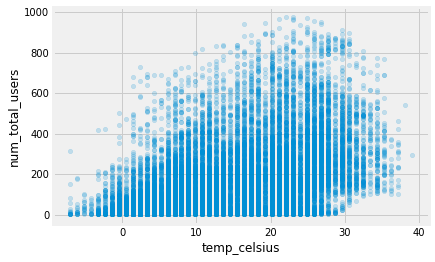

In [15]:
# make a scatterplot of `num_total_users` against `temp_celsius`
# /scrub/
ax = bikes.plot(kind='scatter', x='temp_celsius', y='num_total_users', alpha=0.2);

/Users/gGandenberger/anaconda3/envs/ga/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


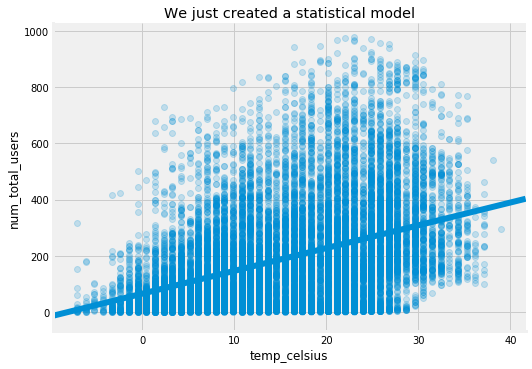

In [16]:
# Use Seaborn to create a scatterplot with regression line
# sns.lmplot does not allow us to pass in an Axes object.
# It creates a FaceGrid object that has the relevant Axes object
# as its ax attribute.
# /scrub/
g = sns.lmplot(x='temp_celsius',
               y='num_total_users',
               data=bikes,
               aspect=1.5, # aspect ratio (width:height)
               scatter_kws={'alpha':0.2}, # this is how you pass arguments to the underlying scatterplot
               );
g.ax.set_title('We just created a statistical model');

We just created a linear regression model!

- **Formula for a line:** $y = mx + b$
- **Alternative notation:** $y = \beta_0 + \beta_1 * x$
- **Our model:** $\mbox{num_total_users} = \beta_0 + \beta_1 * \mbox{temp_celsius} + \epsilon$

We call $\beta_0$ the **model intercept** and $\beta_1$ the **coefficient of `temp_celsius`**.

We call $\epsilon$ the **noise** or **error term**. It accounts for the fact that our points do not lie exactly on a line. Linear regression is designed to be optimal when this noise is normally distributed with constant variance. We ignore it when we use the model to make predictions.

**Exercise (4 mins, in groups).** Answer each question below in terms of $\beta_0$ ("beta naught"), $\beta_1$, and $\epsilon$ ("epsilon").

- What would our model predict for `num_total_users` at `temp_celsius=0`?

/scrub/

$\beta_0$

- If `temp_celsius` increases by 1, how does our model's prediction for `num_total_users` change? What if $\beta_1$ were negative?

/scrub/

It increases by $\beta_1$. If $\beta_1$ were negative, then it would decrease by $|\beta_1|$.

$\blacksquare$

It's important to understand that this model does **not** tell us what would happen if we were to *intervene* to change the temperature in Celsius (say, by deploying thousands of heat lamps around the city). It may be that temperature is correlated with ridership purely because students are more likely to ride when they are on break and they have their longest break during the summer, and not directly because of the temperature. In that case, intervene to change the temperature directly will have no effect.

**Machine learning models trained on passively collected data (as opposed to data from an experiment) cannot be expected to generalize to scenarios in which you are interfering with the system.** We will talk more about this issue in a lesson on causation.

**Takeaways:**

- Linear regression with one input feature chooses the *line* that "best fits" a scatterplot of the target variable against that input feature.
- The model intercept tells you what the model would predict if all of the input variables were zero.
- The coefficient on a variable tells you how much and in what direction the model's prediction would change if the relevant variable were to increase by 1.
- If the data was collected passively (e.g. not as part of a randomized experiment), then a linear regression model is **not** reliable for telling you what would happen if you were to intervene to change the value of a feature.

## Building a Linear Regression Model with scikit-learn

When we called `sns.lmplot`, `seaborn` created a linear regression model which it then displayed to us.

A more typical workflow for creating a linear regression model uses scikit-learn.

scikit-learn is the most popular Python library for machine learning.

**Strengths:**

- Includes good implementations of a wide range of algorithms.
- Provides consistent interface across model types.
- Provides excellent documentation.
- Large community --> tons of resources for learning and getting questions answered.

**Limitations:**

- Designed primarily for single-thread, in-memory computing.
- Has only basic capabilites for deep learning.
- Reflects machine learning rather than statistics mindset: focuses on predictive accuracy on held-out data rather than hypothesis testing, parameter estimation, and model interpretation.

### Preparing the Data

In [17]:
# 1. Split your feature columns from your target column
# /scrub/
target_col = 'num_total_users'
X = bikes.drop(target_col, axis='columns')
y = bikes.loc[:, target_col]

In [18]:
# 2. Refine your feature columns.
# In machine learning competitions, most of the work happens in this step.
# We will talk more about "feature engineering" in another lesson.
# For now, let's just select the temp_celsius column.
# /scrub/
feature_cols = ['temp_celsius']
X = X.loc[:, feature_cols]

In [19]:
# 3. Split your rows into a training set and a test set.
# Setting a value for `random_state` ensures that we get the same
# result if we run this code more than once, which can be helpful
# for debugging. What we set it to is arbitrary.
# /scrub/
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=16)

### Training the Model

In [20]:
# 1. Import the LinearRegression model class.
# /scrub/
from sklearn.linear_model import LinearRegression

In [21]:
# 2. Make an instance of the LinearRegression class.
# /scrub/
lr_celsius = LinearRegression()
type(lr_celsius)

sklearn.linear_model.base.LinearRegression

In [22]:
# 3. Train the model instance on the training set.
# Fitting changes the model `lr_celsius` in-place. scikit-learn is figuring out
# the values to use for $\beta_0$ and $\beta_1$ and storing them inside the model
# so that it can be used for prediction.
# /scrub/
lr_celsius.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Evaluating the Model

In [23]:
# Score the model on the test set.
# /scrub/
lr_celsius.score(X_test, y_test)

0.16374148858298476

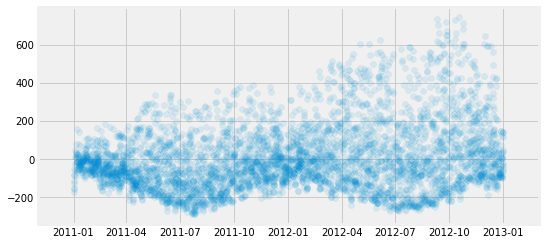

In [24]:
# Look at the model's errors against time
# /scrub/
fig, ax = plt.subplots(figsize=(8, 4))
residuals = y_test - lr_celsius.predict(X_test)
ax.scatter(x=X_test.index, y=residuals, alpha=.1);

**Exercise (4 mins.)**

- What would the plot above look like if our model's predictions were perfectly accurate?

/scrub/

The points would all lie on the line `y=0`.

- Recall that linear regression is designed to be optimal when errors around a linear model are normally distributed around zero with constant variance. Is that what we see in this case?

/scrub/

No, we see right-skewed errors with changing bias and increasing variance.

$\blacksquare$

### Takeaway: Basic Scikit-Learn Supervised Learning Workflow

- **Prepare the data:**
    - Load it in. Reshape it is necessary so that each row is an observation and each column is a variable.
    - Split columnwise into a target variable and one or more feature variables.
    - Transform your variables to make them more useful to your model.
    - Split rowwise into a training set and a test set.
- **Train the model:**
    - Import the model class.
    - "Instantiate" the class. You can specify "hyperparameters" at this point.
    - Fit the model instance on the training set. (This step changes the model object in-place.)
- **Measure the model's performance on the test set.**

## Linear Regression with Multiple Features

- **Using `temp_celsius` only:** $\mbox{num_total_users} = \beta_0 +  \beta_1 * \mbox{temp_celsius} + \epsilon$
- **Using `temp_celsius` and `humidity_percent`:** $\mbox{num_total_users} = \beta_0 +  \beta_1 * \mbox{temp_celsius} +  \beta_2 * \mbox{humidity_percent} + \epsilon$

Linear regression with two input features chooses the *plane* that "best fits" a 3D scatterplot of the target variable against those input features.

<img src="../assets/images/3d_scatterplot.png" style="height: 350px">

In general, linear regression chooses the "hyperplane" that "best fits" a scatterplot of the target variable against the input features.

**Exercise (7 mins., in groups)** Answer each question below for the second model written out above, in terms of $\beta_0$, $\beta_1$, $\beta_2$, and $\epsilon$ ("epsilon").

- What would our model predict for `num_total_users` at `temp_celsius=0` and `humidity_percent=0`?

/scrub/

$\beta_0$

- If `temp_celsius` increases by 5 while `percent_humidity` remains the same, how does our model's prediction for `num_total_users` change?

/scrub/

It increases by $5*\beta_1$.

- If `percent_humidity` decreases by 3 while `temp_celsius` remains the same, how does our model's prediction for `num_total_users` change?

/scrub/

It decreases by $3*\beta_2$

- Why does the previous question say "while `temp_celsius` remains the same?"

/scrub/

`humidity_percent` might be correlated with temperature, for instance. In that case, a typical day with `humidity_percent` 60 would be warmer than a typical day with `humidity_percent` 57. The coefficient on `humidity_percent` doesn't reflect this relationship. It only reflects the influence of `humidity_percent` on the model's predictions *all else being equal*.

- What would it mean if a feature had a coefficient of 0?

/scrub/

It would mean that the feature made no difference to the model's predictions, holding all other features fixed.

$\blacksquare$

**Takeaways:** Interpretation of the parameters of a linear regression model does not change as we add more variables, except that each coefficient tells us how the model's prediction would change if the associated variable were to change *while all other variables remained the same*.

Let's build a linear regression model with two features.

In [25]:
# 1. Split your feature columns from your target column
# We still have `y` from before, but we'll create it again for practice.
# We have to start over with `X` because we kept only "temp_celsius" before.
# /scrub/
target_col = 'num_total_users'
X = bikes.drop(target_col, axis='columns')
y = bikes.loc[:, target_col]

In [26]:
# 2. Refine your feature columns.
# /scrub/
feature_cols = ['temp_celsius', 'humidity_percent']
X = X.loc[:, feature_cols]

In [27]:
# 3. Split your rows into a training set and a test set.
# /scrub/
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=16)

### Training the Model

In [28]:
# 1. Import the LinearRegression model class.
# We don't have to do this again, but we will for practice.
# /scrub/
from sklearn.linear_model import LinearRegression

In [29]:
# 2. Make an instance of the LinearRegression class.
# We could retrain our original model, but it seems more natural
# to start over with a new model.
# /scrub/
lr2 = LinearRegression()
type(lr2)

sklearn.linear_model.base.LinearRegression

In [30]:
# 3. Train the model instance on the training set.
# /scrub/
lr2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
# 4. Score the model on the test set.
# /scrub/
lr2.score(X_test, y_test)

0.25383517958265567

**Exercise (8 mins., in pairs)**

Build another linear regression model, this time using all of our features (not including except `num_casual_users`, `num_registered_users`, and `num_total_users`) as inputs instead of just `temp_celsius`.

**Model using all columns as given:** $\mbox{num_total_users} = \beta_0 + \beta_1 * \mbox{season_num} + \beta_2 * \mbox{is_holiday} + \beta_3 * \mbox{is_workingday} + \beta_4 * \mbox{weather} + \beta_5 * \mbox{temp_celsius} + \beta_6 * \mbox{atemp_celsius} + \beta_7 * \mbox{humidity_percent} + \beta_8 * \mbox{windspeed_knots} + \epsilon$

- Split your feature columns from your target column.

In [32]:
# /scrub/
target_col = 'num_total_users'
X = bikes.drop(target_col, axis='columns')
y = bikes.loc[:, target_col]

- Refine your feature columns -- just drop the columns we aren't using.

In [33]:
# /scrub/
X = X.drop(['num_casual_users', 'num_registered_users'], axis='columns')

- Run the cell below to check your work. (You do not have to understand how this code works -- just know that it will raise an error if your X or y has the wrong type or shape.)

In [34]:
# Tests
assert isinstance(y, pd.Series)
assert isinstance(X, pd.DataFrame)
assert y.shape == (bikes.shape[0],)
assert X.shape == (bikes.shape[0], 8)

- Split your rows into a training set and a test set.

In [35]:
# /scrub/
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=16)

- Let's not import the `LinearRegression` class again. Just make a new instance of it. Call that instance lr_all to distinguish it from our last model.

In [36]:
# /scrub/
lr_all = LinearRegression()

- Train the model instance on the training set.

In [37]:
# /scrub/
lr_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

- Score the model on the test set.

In [38]:
# /scrub/
lr_all.score(X_test, y_test)

0.2713195998140574

$\blacksquare$

### Exploring the intercept and coefficients of the linear model

In [39]:
# Print intercept and coefficients
# /scrub/
print(lr_all.intercept_)
print(lr_all.coef_)

218.09834976205892
[ 18.86772248 -23.50804226   2.31536083   8.55638388   0.83262738
   4.9635344   -2.99739306  48.9440354 ]


In [40]:
# `zip` example
# /scrub/
list(zip(['a', 'b', 'c'], [1, 2, 3]))

[('a', 1), ('b', 2), ('c', 3)]

In [41]:
# Use `zip` to get variable names next to coefficients
# /scrub/
list(zip(X.columns, lr_all.coef_))

[('season_num', 18.867722478880335),
 ('is_holiday', -23.508042255544026),
 ('is_workingday', 2.3153608290035765),
 ('weather', 8.556383884307763),
 ('temp_celsius', 0.8326273805476504),
 ('atemp_celsius', 4.96353440077634),
 ('humidity_percent', -2.997393055175135),
 ('windspeed_knots', 48.94403540043124)]

**Exercise (1 min.).** How do the model's predictions change for a holiday vs. a non-holiday, all else being equal?

In [42]:
# /scrub/
X.columns

Index(['season_num', 'is_holiday', 'is_workingday', 'weather', 'temp_celsius',
       'atemp_celsius', 'humidity_percent', 'windspeed_knots'],
      dtype='object')

/scrub/

They decrease by 21.8

$\blacksquare$

In [44]:
# Write the dataset to disk with our modifications so that we can pick up
# where we left off in the next module
# /scrub/
bikes.to_csv('../assets/data/bikeshare_modified.csv')

## A Little Theory

### What "Best Fits" Means

Fitting a linear regression selects the coefficients and intercept that minimize the **sum of squared errors** of the fitted values on the training set.

![Estimating coefficients](../assets/images/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

### An Overview of Supervised Learning

![Supervised learning diagram](../assets/images/supervised_learning.png)

## Summary

### Linear Regression

- Linear regression predicts a target variable by multiplying each feature by a coefficient and adding up the results along with an additional intercept term.
- Fitting a linear regression model chooses the coefficients and intercept that minimize mean squared error on the training set.
- The intercept tells you what the model predicts when all features are 0.
- Each coefficient tells you how the model's predictions change when that variables value increases by one and all other variables stay the same.

### Supervised Learning

- In general, a supervised learning algorithm learns a function that it can use to predict the target variable from the input features.
- Scikit-learn supervised learning workflow:
    - Prepare the data:
        - Load it in. Reshape it is necessary so that each row is an observation and each column is a variable.
        - Split columnwise into a target variable and one or more feature variables.
        - Transform your variables to make them more useful to your model.
        - Split rowwise into a training set and a test set.
    - Train the model:
        - Import the model class.
        - "Instantiate" the class. You can specify "hyperparameters" at this point.
        - Fit the model instance on the training set. (This step changes the model object in-place.)
    - Measure the model's performance on the test set.
- A machine learning model trained on passively collected data is not reliable for predicting what will happen if we intervene to change something in the system.